In [142]:
import numpy as np
import scipy.linalg
import scipy.io
%matplotlib inline

def trans_cov(dat, cov, mean=np.array([[0],[0]])):
    evals, evecs = scipy.linalg.eigh(cov)
    c = np.dot(evecs, np.diag(np.sqrt(evals)))
    res = np.dot(c,dat)
    if not np.allclose(np.round(np.cov(res)), cov):
        print(np.cov(res))
    res = res + mean
    assert np.allclose(np.round(np.mean(res, axis=1)), mean.T[0])
    
    return res

In [76]:
dats = [
            [trans_cov(np.random.randn(2, 200), np.eye(2)),
             trans_cov(np.random.randn(2, 200), np.eye(2), np.array([[3],[0]]))],
    
            [trans_cov(np.random.randn(2, 200), np.array([[4,3],[3,4]]), np.array([[-1],[0]])),
             trans_cov(np.random.randn(2, 200), np.array([[4,3],[3,4]]), np.array([[1],[0]]))],
    
            [trans_cov(np.random.randn(2, 200), np.array([[3,1],[1,2]])),
             trans_cov(np.random.randn(2, 200), np.array([[7,-3],[-3,4]]), np.array([[3],[0]]))]
        ]

[[ 7.72070805 -3.31569797]
 [-3.31569797  4.69707114]]


In [77]:
dats.append([scipy.io.loadmat("case4.mat")["a"], scipy.io.loadmat("case4.mat")["b"]])

In [138]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

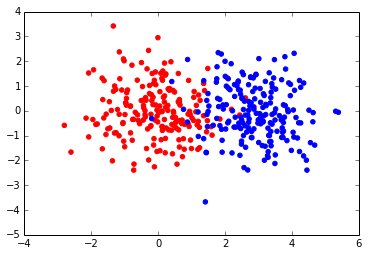

In [143]:
dat = dats[0]
fig = plt.figure()
plt.scatter(dat[0][0], dat[0][1], color="red")
plt.scatter(dat[1][0], dat[1][1], color="blue")
plt.show()

In [133]:
def med(c1, c2):
    """Create an med function"""
    z1 = np.mean(c1, axis=1)
    z2 = np.mean(c2, axis=1)
    def f(x):
        return -np.dot(z1,x) + 0.5*np.dot(z1.T,z1) < -np.dot(z2,x) + 0.5*np.dot(z2.T,z2)
    return f

In [134]:
af = med(dat[0], dat[1])

In [137]:
res1 = af(dat[0])
res2 = af(dat[1])

In [ ]:
def ged(c1, c2):
    # transform each class to have have perfect covariance
    
    # then do the usual med
    

In [139]:
np.cov(dat[0])

array([[ 0.95775183, -0.05674961],
       [-0.05674961,  1.09919095]])

In [140]:
from numpy.linalg import norm, inv

def map_class(c1, c2):
    e1 = np.cov(c1)
    e2 = np.cov(c2)
    u1 = np.cov(u1)
    u2 = np.cov(u2)
    
    def f(x):
        return np.log(np.sqrt(norm(e2))/np.sqrt(norm(e1))) \
               -0.5*(x - u1)*inv(e1)*(x-u1).T \
               +0.5*(x - u2)*inv(e2)*(x-u2).T \
                < 0

In [1]:
def knn(c1, c2, k):
    # initiaslise with K points from each class
    c1_res = np.zeros(c1.shape)
    c1_count = 0
    c2_res = np.zeros(c2.shape)
    c2_count = 0
    c_all = np.concatenate((c1, c2))

    for (_x, _y), val in np.ndenumerate(c_all):
        #find the nearest K neighbours
        ind = np.argpartition(norm(c_all.T - val, axis=1), -k)[-k:]
        
        # class the point where the majority of the neighbours are
        for ix in ind:
            if ix < c1.shape[0]:
                c1_res[c1_count] = val
                c1_count += 1
            else:
                c2_res[c2_count] = val
                c2_count += 1
    
    return (c1_res, c2_res)

In [144]:
np.cov(np.random.randn(2, 200))

array([[ 0.9483421 ,  0.01645694],
       [ 0.01645694,  1.06190215]])